In [1]:
from classification import plot_sigma_vs_k
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import MaxNLocator
import pypulse as pyp
import glob
import pypulse as pyp
import sys
import scipy.special as special
from IPython.display import display
from lmfit import Minimizer, Parameters, create_params, report_fit, Model

,n_clusters,TOA,sigma_TOA
0.00,[1],19.067766,0.065685
0.08,2,-0.000156,0.062073
0.09,2,-0.000156,0.062073
0.10,3,-0.000234,0.059746
0.11,3,-0.000234,0.059746
0.12,3,-0.000234,0.059746
0.13,4,-0.000066,0.063086
0.14,4,-0.000066,0.063086
0.15,4,-0.000066,0.063086
0.16,4,-0.000066,0.063086


<Axes: >

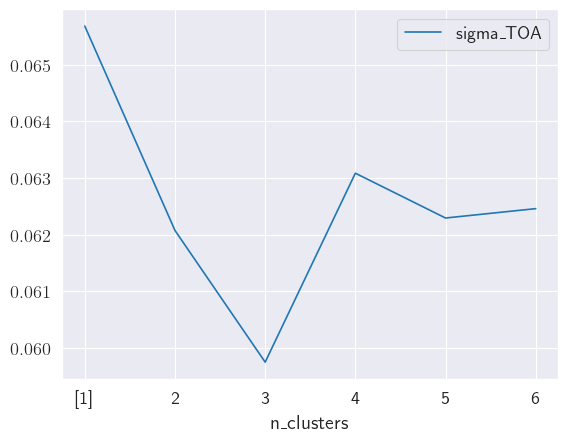

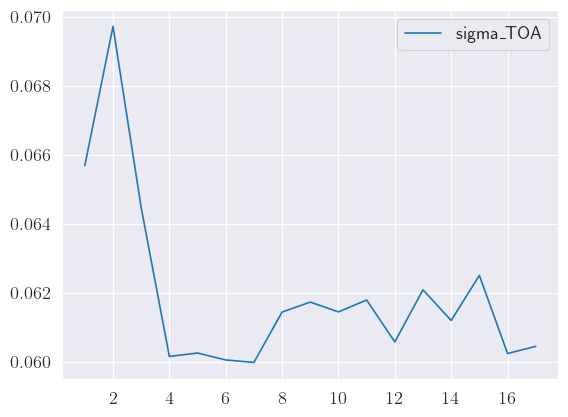

In [22]:
OPTICS_results = pd.read_pickle("/Users/vs4793/PycharmProjects/highfluencetiming/results/pol_calibrated/820_band_meerguard_pazr/0.0_sigma/OPTICS/results.pkl")
display(OPTICS_results)
new_OPTICS_results = OPTICS_results.drop_duplicates(subset='n_clusters')

Kmeans_results = pd.read_pickle("/Users/vs4793/PycharmProjects/highfluencetiming/results/pol_calibrated/820_band_meerguard_pazr/0.0_sigma/Kmeans/results.pkl")

new_OPTICS_results.plot(x="n_clusters", y="sigma_TOA")
Kmeans_results.plot(y="sigma_TOA")

In [28]:
clusters_results = pd.read_pickle("/Users/vs4793/PycharmProjects/highfluencetiming/results/pol_calibrated/820_band_meerguard_pazr/0.0_sigma/Kmeans/7_clusters/7_clusters_results.plk")
clustered_data = pd.read_pickle("/Users/vs4793/PycharmProjects/highfluencetiming/results/pol_calibrated/820_band_meerguard_pazr/0.0_sigma/Kmeans/8_kmeans_clusters.pkl")
labels = clustered_data.to_numpy()[:, 4].astype(int)
n_clusters = len(np.unique(labels))

n_pulses = np.empty(n_clusters)

for cluster_index in range(n_clusters):
    
    n_pulses[cluster_index] = len(labels[labels == cluster_index])
    
clusters_results.insert(3, "Number of single pulses", n_pulses, True)

clusters_results.iloc[1, 0] /= 1000.0

display(clusters_results)

,TOA,sigma_TOA,1/sigma^2,Number of single pulses
0,-0.000315,0.252475,15.687814,8025.0
1,0.0002,0.32277,9.598738,33386.0
2,-0.000443,0.162304,37.961557,50498.0
3,-0.000068,0.17401,33.025791,22534.0
4,0.000121,0.355312,7.920988,22783.0
5,-0.000056,0.11215,79.506531,32798.0
6,-0.000424,0.188226,28.225512,9700.0
7,0.000054,0.307303,10.589286,33561.0


In [114]:
#sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 1.5)

fig = go.Figure(
    data=go.Bar(
        x=clusters_results.index,
        y=clusters_results["Number of single pulses"].values,
        name="Number of single pulses",
        marker=dict(color=px.colors.qualitative.Plotly[0], titlefont=dict(color="black"),),
    )
)

fig.add_trace(
    go.Scatter(
        x=clusters_results.index,
        y=clusters_results["sigma_TOA"].values,
        yaxis="y3",
        name="sigma_TOA",
        marker=dict(color=px.colors.qualitative.Plotly[1]),
    )
)

fig.add_trace(
    go.Scatter(
        x=clusters_results.index,
        y=clusters_results["TOA"].values,
        yaxis="y2",
        name="TOA",
        marker=dict(color=px.colors.qualitative.Plotly[2]),
    )
)

fig.update_layout(
    legend=dict(orientation="h"),
    xaxis=dict(
        domain=[0.075, 1.0],
        titlefont=dict(
            color="black"
        ),
        tickfont=dict(
            color="black"
        )
    ),
    yaxis=dict(
        title=dict(text="Number of single pulses"),
        side="right",
#        range=[0, 250],
        titlefont=dict(
            color="black"
        ),
        tickfont=dict(
            color="black"
        )
    ),
    yaxis2=dict(
        title=dict(text=r"TOA"),
        anchor="free",
#        side="right",
#        range=[0, 2000],
        overlaying="y",
        tickmode="sync",
        titlefont=dict(
            color="black"
        ),
        tickfont=dict(
            color="black"
        ),
    ),
    yaxis3=dict(title=dict(text=r"$\sigma_\mathrm{TOA}$"), anchor="free", overlaying="y", autoshift=True, position=0.075,
        titlefont=dict(
            color="black"
        ),
        tickfont=dict(
            color="black"
        ),),
)

fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")

fig.update_layout(
    title_text="820 band | K-Means with k=8", titlefont=dict(color="black"),
)

fig.write_image("plots/8_clusters.pdf")
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.bar.Marker: 'titlefont'

Did you mean "pattern"?

    Valid properties:
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `marker.colorscale`. Has an effect only if in
            `marker.color` is set to a numerical array. In case
            `colorscale` is unspecified or `autocolorscale` is
            true, the default palette will be chosen according to
            whether numbers in the `color` array are all positive,
            all negative or mixed.
        cauto
            Determines whether or not the color domain is computed
            with respect to the input data (here in `marker.color`)
            or the bounds set in `marker.cmin` and `marker.cmax`
            Has an effect only if in `marker.color` is set to a
            numerical array. Defaults to `false` when `marker.cmin`
            and `marker.cmax` are set by the user.
        cmax
            Sets the upper bound of the color domain. Has an effect
            only if in `marker.color` is set to a numerical array.
            Value should have the same units as in `marker.color`
            and if set, `marker.cmin` must be set as well.
        cmid
            Sets the mid-point of the color domain by scaling
            `marker.cmin` and/or `marker.cmax` to be equidistant to
            this point. Has an effect only if in `marker.color` is
            set to a numerical array. Value should have the same
            units as in `marker.color`. Has no effect when
            `marker.cauto` is `false`.
        cmin
            Sets the lower bound of the color domain. Has an effect
            only if in `marker.color` is set to a numerical array.
            Value should have the same units as in `marker.color`
            and if set, `marker.cmax` must be set as well.
        color
            Sets the marker color. It accepts either a specific
            color or an array of numbers that are mapped to the
            colorscale relative to the max and min values of the
            array or relative to `marker.cmin` and `marker.cmax` if
            set.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.bar.marker.ColorBar`
            instance or dict with compatible properties
        colorscale
            Sets the colorscale. Has an effect only if in
            `marker.color` is set to a numerical array. The
            colorscale must be an array containing arrays mapping a
            normalized value to an rgb, rgba, hex, hsl, hsv, or
            named color string. At minimum, a mapping for the
            lowest (0) and highest (1) values are required. For
            example, `[[0, 'rgb(0,0,255)'], [1, 'rgb(255,0,0)']]`.
            To control the bounds of the colorscale in color space,
            use `marker.cmin` and `marker.cmax`. Alternatively,
            `colorscale` may be a palette name string of the
            following list: Blackbody,Bluered,Blues,Cividis,Earth,E
            lectric,Greens,Greys,Hot,Jet,Picnic,Portland,Rainbow,Rd
            Bu,Reds,Viridis,YlGnBu,YlOrRd.
        colorsrc
            Sets the source reference on Chart Studio Cloud for
            `color`.
        line
            :class:`plotly.graph_objects.bar.marker.Line` instance
            or dict with compatible properties
        opacity
            Sets the opacity of the bars.
        opacitysrc
            Sets the source reference on Chart Studio Cloud for
            `opacity`.
        pattern
            Sets the pattern within the marker.
        reversescale
            Reverses the color mapping if true. Has an effect only
            if in `marker.color` is set to a numerical array. If
            true, `marker.cmin` will correspond to the last color
            in the array and `marker.cmax` will correspond to the
            first color.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace. Has an effect only if in `marker.color` is
            set to a numerical array.
        
Did you mean "pattern"?

Bad property path:
titlefont
^^^^^^^^^

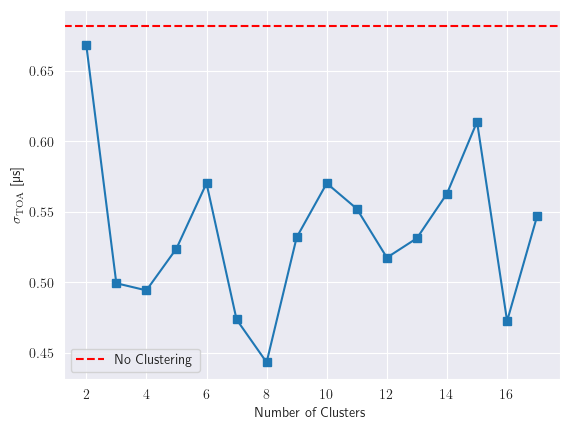

In [2]:
dir: str = "./results/pol_calibrated/L_band_meerguard_pazr/0.0_sigma/Kmeans/"
plot_sigma_vs_k(pd.read_pickle(dir + "results.pkl"), dir, "Kmeans")

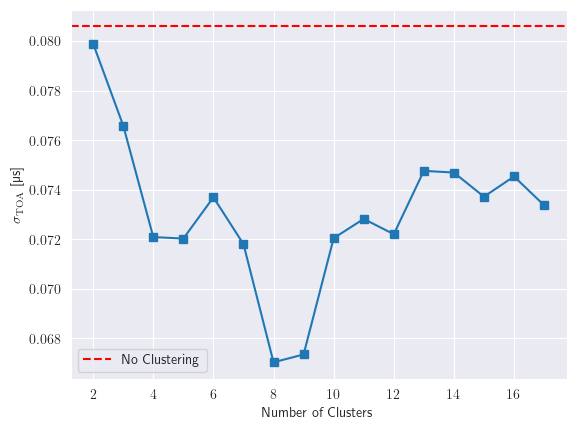

In [3]:
dir: str = "./results/820_band_MeerGuard_paz-r/0.0_sigma/"
plot_sigma_vs_k(pd.read_pickle(dir + "results.pkl"), dir, "Kmeans")

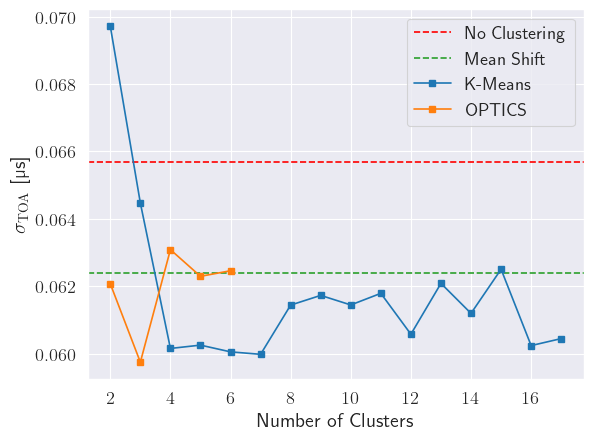

In [2]:
meanshift_res = np.load("./results/pol_calibrated/820_band_meerguard_pazr/0.0_sigma/MeanShift/results.npy", allow_pickle=True)
kmeans_res = pd.read_pickle("./results/pol_calibrated/820_band_meerguard_pazr/0.0_sigma/Kmeans/results.pkl")
OPTICS_results = pd.read_pickle("/Users/vs4793/PycharmProjects/highfluencetiming/results/pol_calibrated/820_band_meerguard_pazr/0.0_sigma/OPTICS/results.pkl")
new_OPTICS_results = OPTICS_results.drop_duplicates(subset='n_clusters').drop(index=0)

sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 1.5)

plt.rcParams['text.usetex'] = True
ax = plt.figure().gca()
ax.set_xlabel("Number of Clusters")
plt.ylabel(r'$\sigma_{\mathrm{TOA}}$ [\textmu s]')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.axhline(y=kmeans_res.loc[1, "sigma_TOA"], color='r', linestyle='--', label="No Clustering")

ax.axhline(y=meanshift_res[1, 1], color='C2', linestyle='--', label="Mean Shift")

ax.plot(kmeans_res.index.values[1:],  # All the row names, except the first one (corresponding to one cluster)
        kmeans_res.iloc[1:, [1]],  # All the errors, except the first one (corresponding to one cluster)
        linestyle='-', marker='s', label="K-Means")

ax.plot(new_OPTICS_results['n_clusters'],  # All the row names, except the first one (corresponding to one cluster)
        new_OPTICS_results['sigma_TOA'],  # All the errors, except the first one (corresponding to one cluster)
        linestyle='-', marker='s', label="OPTICS")

plt.legend()
#plt.savefig("./plots/clustering_results.pdf")
plt.show()

./results/pol_calibrated/820_band_pazr/0.0_sigma/ 0.0743881945797916 0.07336966610791733
./results/pol_calibrated/820_band_meerguard_pazr/0.0_sigma/ 0.07337638270453584 0.07356012206820059
./results/pol_calibrated/820_band_meerguard_clfd_pazr/0.0_sigma/ 0.07426924530974657 0.07425896715678185
./results/820_band_paz-r/0.0_sigma/ 0.07306374188646785 0.07205857384866476
./results/820_band_meerguard_paz-r/0.0_sigma/ 0.07304347964292424 0.07310178809438571
The smallest mean error was 0.07304347964292424
The smallest median error was 0.07205857384866476


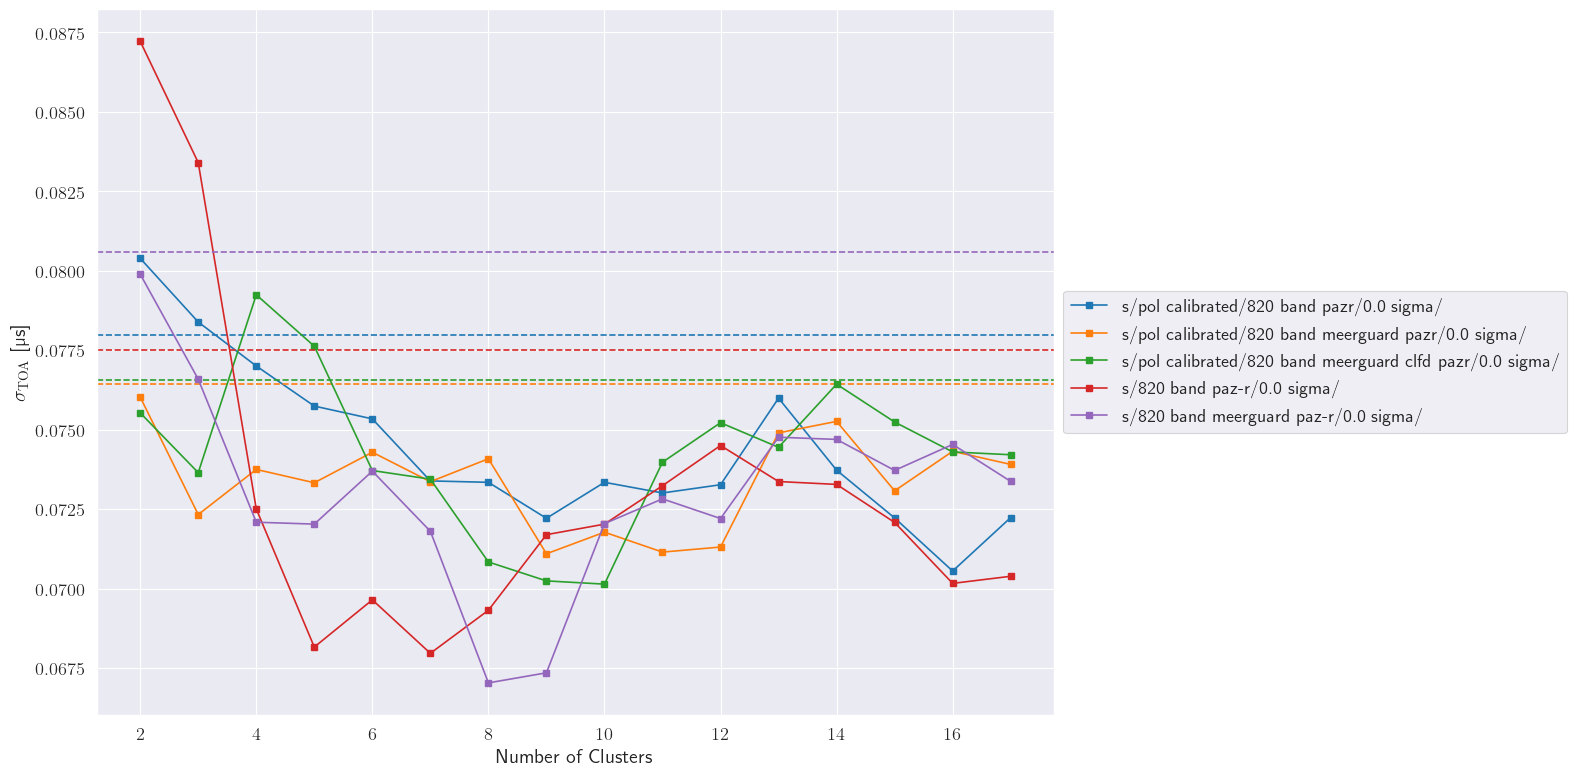

In [6]:
sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 1.5)
dirs= ["./results/pol_calibrated/820_band_pazr/0.0_sigma/", "./results/pol_calibrated/820_band_meerguard_pazr/0.0_sigma/", "./results/pol_calibrated/820_band_meerguard_clfd_pazr/0.0_sigma/", "./results/820_band_paz-r/0.0_sigma/", "./results/820_band_meerguard_paz-r/0.0_sigma/"]

cmap = sns.color_palette(n_colors=len(dirs))
mean_error = np.empty(len(dirs))
median_error = np.empty(len(dirs))

plt.close()
plt.rcParams['text.usetex'] = True
ax = plt.figure(figsize=(16, 8)).gca()
ax.set_xlabel("Number of Clusters")
plt.ylabel(r'$\sigma_{\mathrm{TOA}}$ [\textmu s]')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
for n, dir in enumerate(dirs):
    
    results = pd.read_pickle(dir + "results.pkl")

    ax.axhline(y=results.loc[1, "sigma_TOA"], color=cmap[n], linestyle='--')
    ax.plot(results.index.values[1:],  # All the row names, except the first one (corresponding to one cluster)
            results.iloc[1:, [1]],  # All the errors, except the first one (corresponding to one cluster)
            linestyle='-', color=cmap[n], marker='s', label=dir[8:].replace("_"," "))
    
    mean_error[n] = np.mean(results.iloc[1:, [1]])
    median_error[n] = np.median(results.iloc[1:, [1]])
    print(dir + " " + str(mean_error[n]) + " " + str(median_error[n]))
    
print(f'The smallest mean error was {np.amin(mean_error)}')
print(f'The smallest median error was {np.amin(median_error)}')

    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

820_band_No_Cleaning 0.09978610908343725 0.09719506181949594
820_band_MeerGuard 0.07580299381180729 0.07492289056252835
820_band_clfd 0.0936548095640215 0.09148193709398017
820_band_MeerGuard_clfd 0.0758819846660057 0.07551467299551404
820_band_paz-r 0.07306374188646785 0.07205857384866476
820_band_MeerGuard_paz-r 0.07304347964292424 0.07310178809438571
820_band_MeerGuard_clfd_paz-r 0.07392973969634216 0.07442897914235852
820_band_paz-L 0.07618819873385255 0.0756623238881254
820_band_paz-r-L 0.07450511775680772 0.07238905320416497
820_band_MeerGuard_paz-r-L 0.07710032154477053 0.07689873028800061
820_band_MeerGuard_clfd_paz-r-L 0.07662433993765866 0.0762539903786239
The smallest mean error was 0.07304347964292424
The smallest median error was 0.07205857384866476


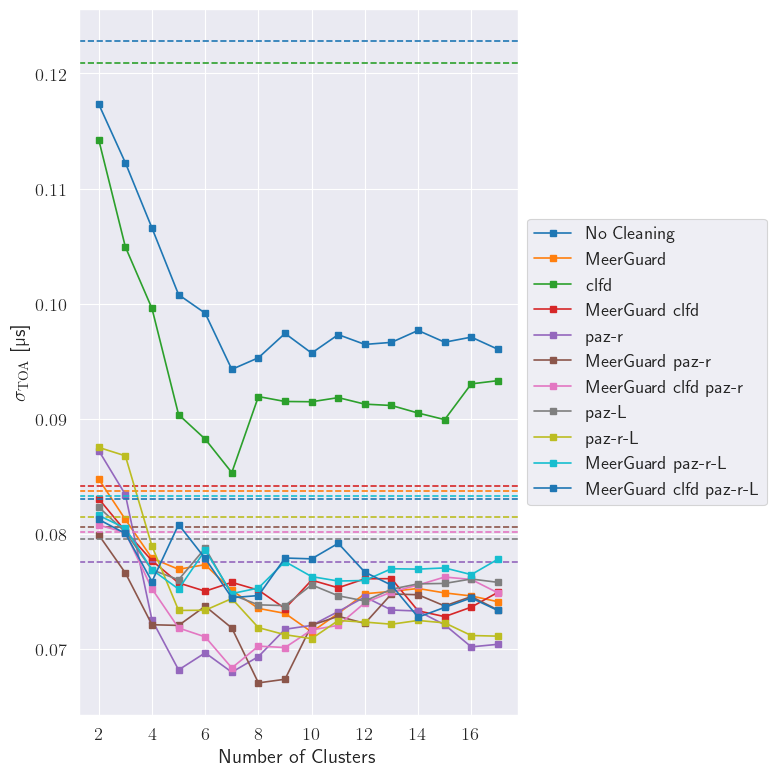

In [11]:
sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 1.5)
dirs= ["820_band_No_Cleaning", "820_band_MeerGuard", "820_band_clfd", "820_band_MeerGuard_clfd", "820_band_paz-r", "820_band_MeerGuard_paz-r", "820_band_MeerGuard_clfd_paz-r", "820_band_paz-L", "820_band_paz-r-L", "820_band_MeerGuard_paz-r-L", "820_band_MeerGuard_clfd_paz-r-L"]
#dirs = ["L_band_rficlean", "L_band_MeerGuard_clfd_maskRFI"]

cmap = sns.color_palette(n_colors=len(dirs))
mean_error = np.empty(len(dirs))
median_error = np.empty(len(dirs))

plt.close()
plt.rcParams['text.usetex'] = True
ax = plt.figure(figsize=(8, 8)).gca()
ax.set_xlabel("Number of Clusters")
plt.ylabel(r'$\sigma_{\mathrm{TOA}}$ [\textmu s]')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
for n, dir in enumerate(dirs):
    
    results = pd.read_pickle("./results/" + dir + "/0.0_sigma/results.pkl")

    ax.axhline(y=results.loc[1, "sigma_TOA"], color=cmap[n], linestyle='--')
    ax.plot(results.index.values[1:],  # All the row names, except the first one (corresponding to one cluster)
            results.iloc[1:, [1]],  # All the errors, except the first one (corresponding to one cluster)
            linestyle='-', color=cmap[n], marker='s', label=dir[8:].replace("_"," "))
    
    mean_error[n] = np.mean(results.iloc[1:, [1]])
    median_error[n] = np.median(results.iloc[1:, [1]])
    print(dir + " " + str(mean_error[n]) + " " + str(median_error[n]))
    
print(f'The smallest mean error was {np.amin(mean_error)}')
print(f'The smallest median error was {np.amin(median_error)}')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("./plots/recipes_820_band.pdf")
plt.show()

L_band_No_Cleaning 1.8558243721287406 1.42864696645834
L_band_pazr 2.009391812381436 0.5884496179812166
L_band_pazL 2.3182251973877697 1.5358919370157489
L_band_pazrL 1.9447998055314304 0.6104277128975367
L_band_meerguard_pazr 0.7981769181584252 0.7594869528285468
L_band_MeerGuard_clfd_maskRFI 0.48699872062017163 0.5058284268966367
L_band_MeerGuard_clfd_pazr 0.7664067296973089 0.6818269065766813
The smallest mean error was 0.48699872062017163
The smallest median error was 0.5058284268966367


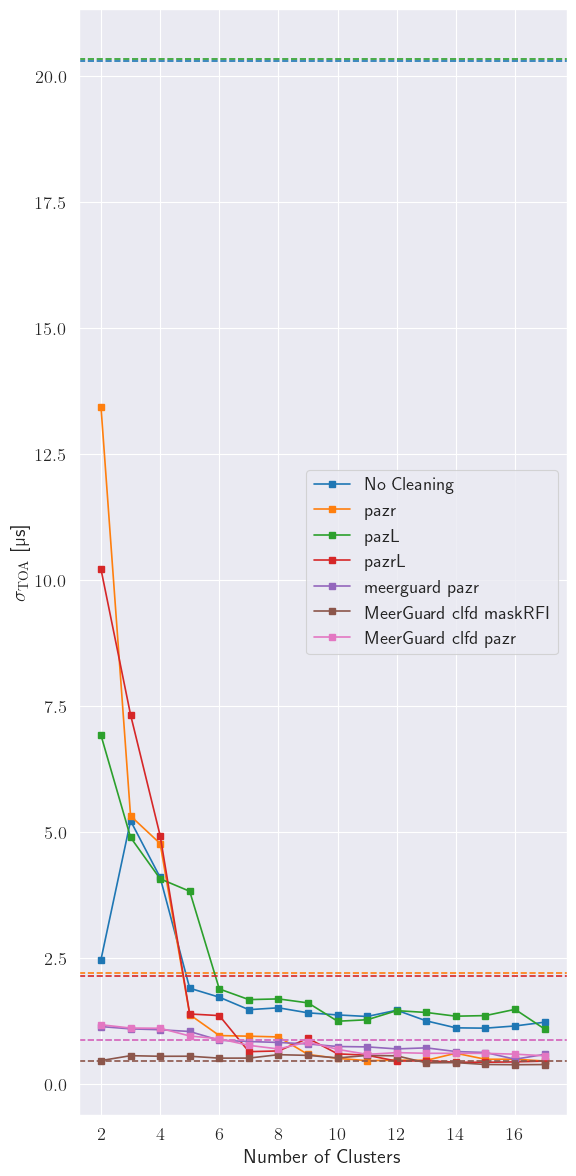

In [5]:
sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 1.5)
dirs= ["L_band_No_Cleaning", "L_band_pazr", "L_band_pazL", "L_band_pazrL", "L_band_meerguard_pazr", "L_band_MeerGuard_clfd_maskRFI", "L_band_MeerGuard_clfd_pazr"]
#dirs = ["L_band_rficlean", "L_band_MeerGuard_clfd_maskRFI"]

cmap = sns.color_palette(n_colors=len(dirs))
mean_error = np.empty(len(dirs))
median_error = np.empty(len(dirs))

plt.close()
plt.rcParams['text.usetex'] = True
ax = plt.figure(figsize=(6, 12)).gca()
ax.set_xlabel("Number of Clusters")
plt.ylabel(r'$\sigma_{\mathrm{TOA}}$ [\textmu s]')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
for n, dir in enumerate(dirs):
    
    results = pd.read_pickle("./results/" + dir + "/0.0_sigma/results.pkl")

    ax.axhline(y=results.loc[1, "sigma_TOA"], color=cmap[n], linestyle='--')
    ax.plot(results.index.values[1:],  # All the row names, except the first one (corresponding to one cluster)
            results.iloc[1:, [1]],  # All the errors, except the first one (corresponding to one cluster)
            linestyle='-', color=cmap[n], marker='s', label=dir[7:].replace("_"," "))
    
    mean_error[n] = np.mean(results.iloc[1:, [1]])
    median_error[n] = np.median(results.iloc[1:, [1]])
    print(dir + " " + str(mean_error[n]) + " " + str(median_error[n]))
    
print(f'The smallest mean error was {np.amin(mean_error)}')
print(f'The smallest median error was {np.amin(median_error)}')

plt.legend()
plt.tight_layout()
#plt.savefig("./plots/recipes.pdf")
plt.show()

In [ ]:
dirs = ["0.0_sigma", "0.5_sigma", "1.0_sigma", "1.5_sigma", "2.0_sigma", "2.5_sigma", "3.0_sigma", "3.5_sigma", "4.0_sigma"]

for dir in dirs:
    data = pd.read_pickle("./results/final/820_band_meerguard_pazr/" + dir + "/unnormalized_data.pkl")
    plt.close()
    plt.title(dir.replace("_", " "))
    data.iloc[14].plot()
    plt.show()

/Users/vs4793/anaconda3/envs/pulsar/lib/python3.12/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/Users/vs4793/anaconda3/envs/pulsar/lib/python3.12/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/Users/vs4793/anaconda3/envs/pulsar/lib/python3.12/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


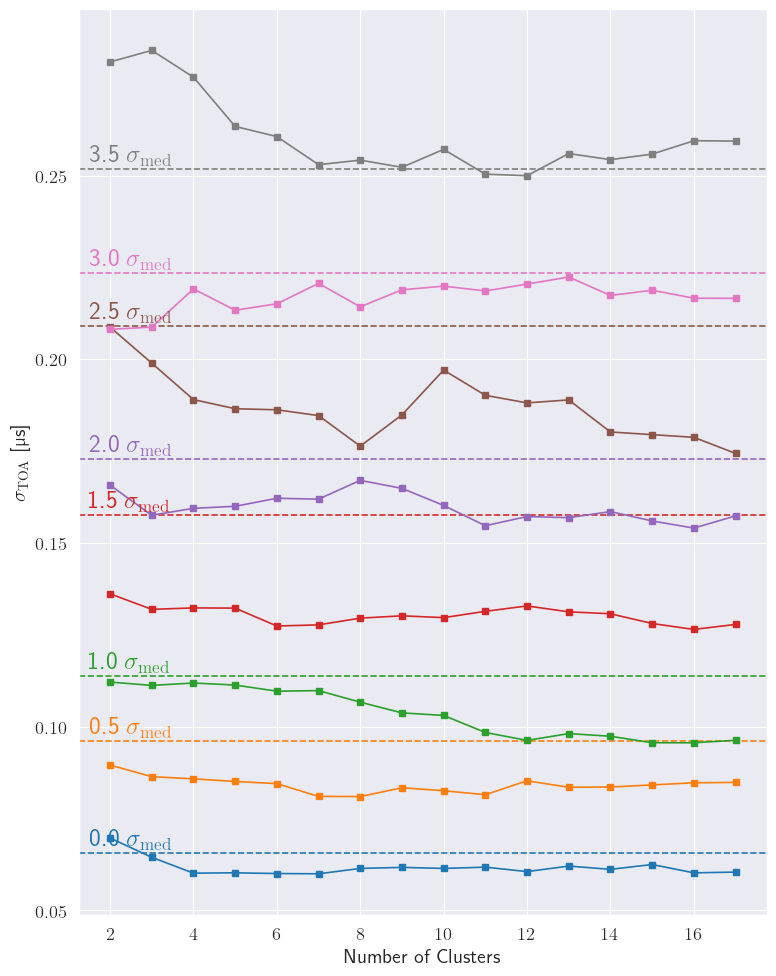

In [7]:
dirs = ["0.0_sigma", "0.5_sigma", "1.0_sigma", "1.5_sigma", "2.0_sigma", "2.5_sigma", "3.0_sigma", "3.5_sigma"]

sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 1.5)

plt.rcParams['text.usetex'] = True

ax = plt.figure(figsize=(8,10)).gca()
ax.set_xlabel("Number of Clusters")
plt.ylabel(r'$\sigma_{\mathrm{TOA}}$ [\textmu s]')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

cmap = sns.color_palette()

for i, dir in enumerate(dirs):
    if i ==0:
        results = pd.read_pickle("./results/pol_calibrated/820_band_meerguard_pazr/" + dir + "/Kmeans/results.pkl")
    else:
        results = pd.read_pickle("./results/820_band/" + dir + "/results.pkl")
    
    ax.axhline(y=results.loc[1, "sigma_TOA"], color=cmap[i], linestyle='--')
    ax.plot(results.index.values[1:],  # All the row names, except the first one (corresponding to one cluster)
            results.iloc[1:, [1]],  # All the errors, except the first one (corresponding to one cluster)
            color=cmap[i], linestyle='-', marker='s')
    ax.annotate(dir[:3] + " $\\sigma_{\\mathrm{med}}$", (results.index.values[1] - 0.5, results.iloc[0, [1]] + 0.002), color=cmap[i], size=18)

#ax.legend(bbox_to_anchor=(1.1, 0.5))    
plt.tight_layout()
plt.savefig("./plots/noise_levels.pdf")
plt.show()

In [ ]:
dirs = ["0.0_sigma", "0.5_sigma", "1.0_sigma", "1.5_sigma", "2.0_sigma", "2.5_sigma", "3.0_sigma", "3.5_sigma", "4.0_sigma"]

plt.rcParams['text.usetex'] = True


for dir in dirs:
    results = pd.read_pickle("./results/820_band/" + dir + "/results.pkl")

    plt.close()
    ax = plt.figure().gca()
    ax.set_xlabel("Number of Clusters")
    plt.ylabel(r'$\sigma_{\mathrm{TOA}}$ [\textmu s]')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(dir.replace("_", " "))
    ax.axhline(y=results.loc[1, "sigma_TOA"], color='r', linestyle='--', label="No Clustering")
    ax.plot(results.index.values[1:],  # All the row names, except the first one (corresponding to one cluster)
            results.iloc[1:, [1]],  # All the errors, except the first one (corresponding to one cluster)
            linestyle='-', marker='s')
    plt.tight_layout()
    plt.show()

In [ ]:
data = pd.read_pickle("./results/820_band_no_clean/unnormalized_data.pkl")
for i in np.arange(0, 10):
    plt.close()
    plt.title("Pulse " + str(i))
    data.iloc[i].plot()
    plt.tight_layout()
    plt.show()

In [ ]:
fig = px.imshow(ds, labels=dict(x="Time (s)", y="Frequency channel (MHz)"), aspect="auto",
                color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [ ]:
av_profile = np.load("./results/L_band/av_pulse_profile.npy")
plt.plot(av_profile)
plt.show()

In [ ]:
template_profile = np.load("./results/L_band/template_data.npy")
plt.plot(template_profile)
plt.show()

In [5]:
#features = pd.read_pickle("/Users/vs4793/PycharmProjects/highfluencetiming/results/820_band/0.0_sigma/Kmeans/5_kmeans_clusters.pkl")
features = pd.read_pickle("/Users/vs4793/PycharmProjects/highfluencetiming/results/pol_calibrated/820_band_meerguard_pazr/0.0_sigma/Kmeans/7_kmeans_clusters.pkl").sort_values('Cluster')

In [6]:
cmap = [px.colors.qualitative.Plotly[i] for i in [3, 0, 5, 2, 9, 4, 1]]

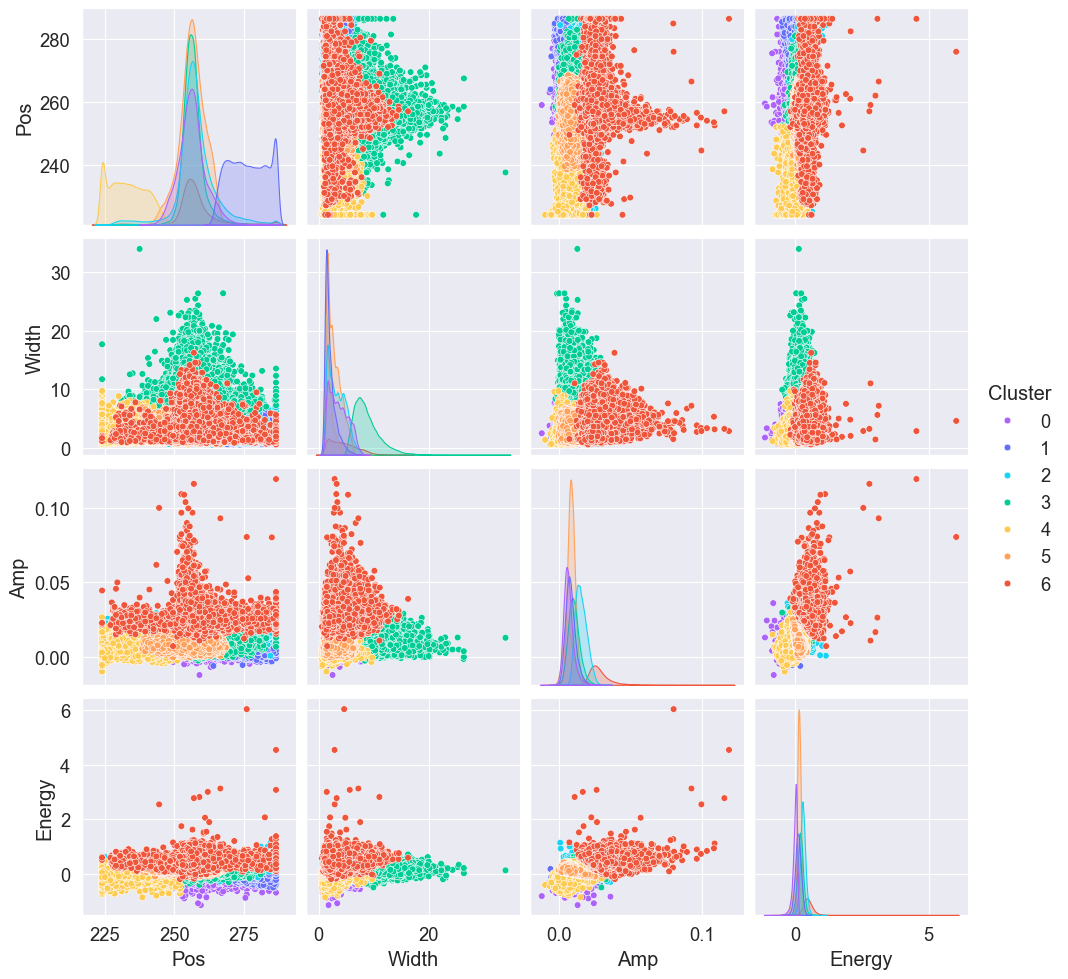

In [8]:
#sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 1.5)

sns.pairplot(features, hue='Cluster', plot_kws=dict(rasterized=True), palette=cmap)
plt.savefig("./plots/7_clusters_pairplot_820.pdf")
plt.show()